In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
gold_data = pd.read_csv("C:/Users/Nikhil12/Desktop/DS_ML internship/project/Gold Price Dataset/gld_price_data.csv")

In [5]:
#First_five_rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#Last_five_rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#number_of_rows_and_columns
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking_number_of_missing_values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#getting_the_statistical_measure_of_the_data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
#Finding_a_correlation
correlation = gold_data.corr()

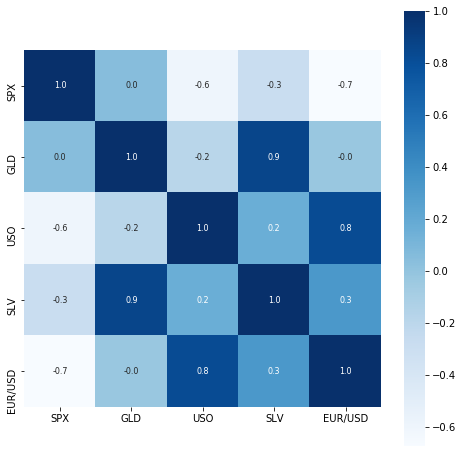

In [15]:
#Constructing_a_heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
#correlation_values_for_gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


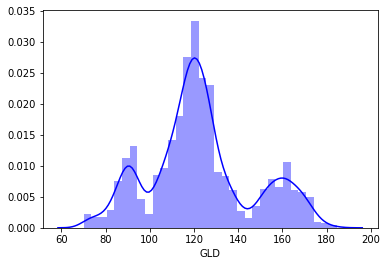

In [35]:
#checking_the_distribution_of_the_gold_Price
sns.distplot(gold_data['GLD'],color='blue')

In [20]:
#Splitting_feature_and_target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
#Splitting_into_training_data_and_test_data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [28]:
#Model_training='Random_forest_regressor"
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
#Prediction_on_test_data
test_data_prediction = regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[168.61079972  82.32319966 116.07330023 127.7164005  120.68300086
 154.63769664 150.33739865 126.16240036 117.34189873 125.92190111
 116.66310095 171.93890076 141.46979939 167.68309845 115.29569996
 117.77680067 138.71940325 170.42150091 159.87650347 157.21879951
 155.06500023 125.0989001  175.97039959 157.01750323 125.25970029
  93.89519955  77.75210018 120.3304998  119.1121994  167.63659914
  88.16780036 125.41720002  91.25080076 117.73340012 121.04489962
 136.01970083 115.30400148 115.27510068 147.04210007 107.17230078
 104.58810246  87.22309793 126.63590076 117.81700017 153.83099932
 119.6649002  108.33560009 107.87909811  93.13130051 127.18959763
  75.00790036 113.64969881 121.37409993 111.14469896 118.78049881
 121.07589937 158.94130055 168.23740069 147.19749708  85.76659838
  94.39140043  86.81209847  90.58710005 118.99300054 126.40890056
 127.46470016 169.62309922 122.22029929 117.40719889  98.65489997
 168.77990192 143.03489877 132.0318031  121.03410216 121.33879955
 119.82820

In [32]:
#R_squared_error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891696692563404


In [33]:
#Comparing_actual_values_and_predicted_values
Y_test = list(Y_test)

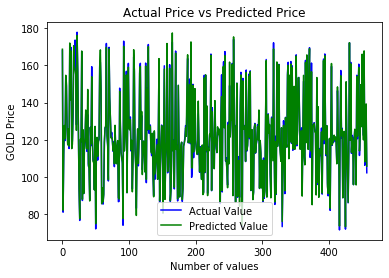

In [36]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()